In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
Dist = pd.DataFrame([[0,1,2,3,1,2,3,4],[1,0,1,2,2,1,2,3],[2,1,0,1,3,2,1,2],
                      [3,2,1,0,4,3,2,1],[1,2,3,4,0,1,2,3],[2,1,2,3,1,0,1,2],
                      [3,2,1,2,2,1,0,1],[4,3,2,1,3,2,1,0]],
                    columns=["A","B","C","D","E","F","G","H"],
                    index=["A","B","C","D","E","F","G","H"])

Flow = pd.DataFrame([[0,5,2,4,1,0,0,6],[5,0,3,0,2,2,2,0],[2,3,0,0,0,0,0,5],
                      [4,0,0,0,5,2,2,10],[1,2,0,5,0,10,0,0],[0,2,0,2,10,0,5,1],
                      [0,2,0,2,0,5,0,10],[6,0,5,10,0,1,10,0]],
                    columns=["A","B","C","D","E","F","G","H"],
                    index=["A","B","C","D","E","F","G","H"])

In [3]:
print(Dist)

   A  B  C  D  E  F  G  H
A  0  1  2  3  1  2  3  4
B  1  0  1  2  2  1  2  3
C  2  1  0  1  3  2  1  2
D  3  2  1  0  4  3  2  1
E  1  2  3  4  0  1  2  3
F  2  1  2  3  1  0  1  2
G  3  2  1  2  2  1  0  1
H  4  3  2  1  3  2  1  0


In [4]:
print(Flow)

   A  B  C   D   E   F   G   H
A  0  5  2   4   1   0   0   6
B  5  0  3   0   2   2   2   0
C  2  3  0   0   0   0   0   5
D  4  0  0   0   5   2   2  10
E  1  2  0   5   0  10   0   0
F  0  2  0   2  10   0   5   1
G  0  2  0   2   0   5   0  10
H  6  0  5  10   0   1  10   0


In [5]:
T0 = 1500
M = 250
N = 20
alpha = 0.9

In [6]:
X0 = ["B","D","A","E","C","F","G","H"]

In [7]:
# Make a dataframe of the initial solution
New_Dist_DF = Dist.reindex(columns=X0, index=X0)
New_Dist_Arr = np.array(New_Dist_DF)

In [8]:
# Make a dataframe of the cost of the initial solution
Objfun1_start = pd.DataFrame(New_Dist_Arr*Flow)
Objfun1_start_Arr = np.array(Objfun1_start)

In [9]:
sum_start = sum(sum(Objfun1_start_Arr))

In [10]:
print(sum_start)

336


In [11]:
Temp = []
Min_Cost = []

for i in range(M):
    for j in range(N):
        ran_1 = np.random.randint(0,len(X0))
        ran_2 = np.random.randint(0,len(X0))
        
        while ran_1==ran_2:
            ran_2 = np.random.randint(0,len(X0))
        
        xt = []
        xf = []
        
        # ["B","D","A","E","C","F","G","H"]
        
        
        A1 = X0[ran_1]
        A2 = X0[ran_2]

        # Make a new list of the new set of departments
        
        w = 0
        for i in X0:
            if X0[w]==A1:
                xt = np.append(xt,A2)
            elif X0[w]==A2:
                xt = np.append(xt,A1)
            else:
                xt=np.append(xt,X0[w])
            w = w+1
        


        new_dis_df_init = Dist.reindex(columns=X0, index=X0)
        new_dis_init_arr = np.array(new_dis_df_init)
        
        
        new_dis_df_new = Dist.reindex(columns=xt, index=xt)
        new_dis_new_arr = np.array(new_dis_df_new)
        
        
        # Make a adatframe of the current solution
        objfun_init = pd.DataFrame(new_dis_init_arr*Flow)
        objfun_init_arr = np.array(objfun_init)
        
        # Make a adatframe of the new solution
        objfun_new = pd.DataFrame(new_dis_new_arr*Flow)
        objfun_new_arr = np.array(objfun_new)
        
        sum_init = sum(sum(objfun_init_arr))
        sum_new = sum(sum(objfun_new_arr))
        
        rand1 = np.random.rand()
        form = 1/(np.exp(sum_new-sum_init)/T0)
        
        if sum_new<=sum_init:
            X0=xt
        elif rand1<=form:
            X0=xt
        else:
            X0=X0
        
    Temp.append(T0)
    Min_Cost.append(sum_init)
    
    T0 = alpha*T0

In [12]:
print()
print("Final Solution:",X0)
print("Minimized Cost:",sum_init)


Final Solution: ['C' 'D' 'H' 'B' 'A' 'E' 'F' 'G']
Minimized Cost: 214


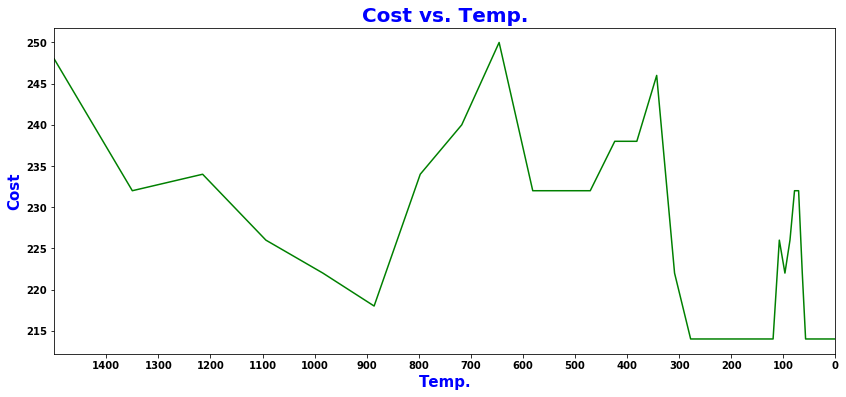

In [13]:
plt.figure(figsize=(14,6))
plt.plot(Temp,Min_Cost, color = 'g')
plt.title("Cost vs. Temp.", fontsize=20,fontweight='bold', color ='b')
plt.xlabel("Temp.", fontsize=15,fontweight='bold', color = 'b')
plt.ylabel("Cost", fontsize=15,fontweight='bold', color= 'b')
plt.xlim(1500,0)
plt.xticks(np.arange(min(Temp),max(Temp),100),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
